# Linear regression

Linear regression is one the simplest yet most powerful machine learning algorithm that ever exists. It is the building blocks for other more advanced algorithms like SVM. The common misconception about linear regression is that it needs to be linear or a straight line. Yet that is incorrect as linear regression can be used to solve non-linear problems too. The 'linear' characteristic here indicates the addiction or weighted sum of the input features. We can engineered the features like applying polynomial transformation to handle a curve and the features serve as constant. 

As all machine learning algorithm, we start with the definition of the problem.
Vectorized form
y_pred = theta.T * x

Refer to https://towardsdatascience.com/vectorization-implementation-in-machine-learning-ca652920c55d
A good article that explains vectorization

Next we need an objective or cost function.
We will use MSE for linear regression. Our goal is to min MSE.
MSE is a convex and differentiable equation.

So the question now is how do we learn theta? Which theta will produce the optimal fit?

One of the solution is via the closed-form solution or the mathematical equation that gives the result directly.
The minima exists for MSE because it is convex. We can get a neat equation that can solves the problem directly.
(refer to the link below)
https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression/

In [1]:
#Normal equation
import numpy as np

#definining x, 100 lines, single column
#Create an array of the given shape and populate it with random samples from a uniform distribution over [0, 1)
x = 3*np.random.rand(100,1)

#This is our solution, 5 is the intercept and 4 is the slope or gradient aka weighted feature
#randn will return random samples from a normal distribution, in this example, it represents noise of the data
y = 5 + 4*x+np.random.randn(100,1)

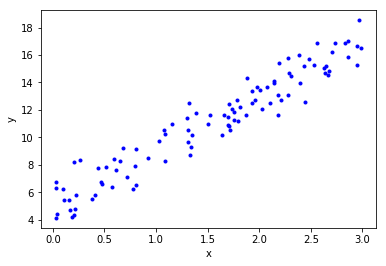

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(x, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')

In [3]:
#Compute theta with Normal equation

#Translates slice objects to concatenation along the second axis.
x_b = np.c_[np.ones((100,1)),x] #add x0 = 1 to every row or each instance, intend to learn intercept and gradient in one go
theta = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
theta

array([[ 5.0471712 ],
       [ 3.96048534]])

So we learn that the intercept is 5.04 and gradient is 3.92. Close enough. Below demo the c_ function.

In [4]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [5]:
np.c_[np.array([1,2,3]), np.ones((3,1))]

array([[ 1.,  1.],
       [ 2.,  1.],
       [ 3.,  1.]])

In [6]:
#Let's make some prediction with the theta that we derived

x_new = np.array([0,3])
x_new_b = np.c_[np.ones((2,1)),x_new]
y_pred = x_new_b.dot(theta)
y_pred

array([[  5.0471712 ],
       [ 16.92862724]])

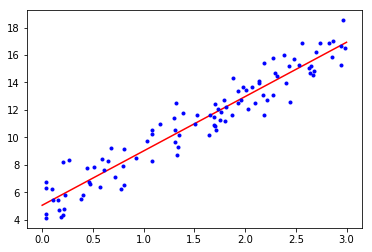

In [7]:
plt.plot(x_new, y_pred, 'r')
plt.plot(x,y, 'b.')

In [8]:
#Quite tedious but we can do this in sklearn too
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
lin_reg.intercept_, lin_reg.coef_

(array([ 5.0471712]), array([[ 3.96048534]]))

In [10]:
lin_reg.predict(x_new.reshape(-1,1))

array([[  5.0471712 ],
       [ 16.92862724]])

Similar to the normal equation solution above.
However, normal equation involves inverse of X.T. It is computational expensive and complicated to invert a large matrix. 
Normal equation gets slow when number of features grow very large (>10,000).

Another point to note, for linear regression after we train the model we only need to keep the intercept and coefficients. Training data are not needed anymore. This is a clear distinction between parametric and non parametric models. We will talk more about that in the coming weeks.

Let's try gradient descent. It is a generic optimization algorithm that works by tweaking parameters iteratively to min a cost function.
https://www.kdnuggets.com/2017/04/simple-understand-gradient-descent-algorithm.html
https://towardsdatascience.com/understanding-the-mathematics-behind-gradient-descent-dde5dc9be06e

It is crucial to understand partial derivatives. 


In [11]:
#Pseudo coding gradient descent
#Step1: Initialize theta randomly
#Step2: Calculate the gradients w.r.t. features
#Step3: Update theta
#Step4: Loop until cost stop reducing or met certain criteria

#A common batch gradient descent 
theta = np.random.randn(2,1) #random initialization, include intercept and slope

step = 0.1 #stepsize or learning rate
n_iter = 1000
m = 100

for i in range(n_iter):
    gradient = 2/m * x_b.T.dot(x_b.dot(theta)-y) #This is MSE, calculating gradients
    theta = theta - step * gradient #Update theta
    
theta

array([[ 5.0471712 ],
       [ 3.96048534]])

Similar to what we got from Normal equation, what will happen if we change the learning rate or the number of iterations?

In [12]:
theta = np.random.randn(2,1) #random initialization, include intercept and slope

step = 0.1 #stepsize or learning rate
n_iter = 10
m = 100

def gd (step, n_iter, theta):
    for i in range(n_iter):
        gradient = 2/m * x_b.T.dot(x_b.dot(theta)-y) #This is MSE, calculating gradients
        theta = theta - step * gradient #Update theta
    return(theta)

print(gd(0.1, 10, theta))
print(gd(0.1, 10000, theta))
print(gd(0.5, 10, theta))
print(gd(0.001, 100, theta))

[[ 3.06563261]
 [ 4.99825639]]
[[ 5.0471712 ]
 [ 3.96048534]]
[[-121756.31496202]
 [-232488.23240779]]
[[ 0.90885788]
 [ 3.04418414]]


The problem with Batch gradient descent is that it uses the whole training set to compute the gradients at every step. This make the process time consuming if the training set is huge. 
The opposite of this is Stochastic gradient descent. It picks a random instance in the training set at every step and computes the gradients based on that single instance. It is fast and less memory hungry.
However, the major flaws of Stochastic GD is that it is less regular than Batch GD. The cost function bounce around and never settle at the minima. We are sacrificing some accuracy for performance.

In [16]:
epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return(t0/(t+t1))

theta = np.random.randn(2,1)

for e in range(epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(e * m+i)
        theta = theta - eta * gradients
        print(e, xi, yi, eta, theta)


0 [[ 1.          0.80882834]] [[ 6.55643018]] 0.1 [[ 1.0016146 ]
 [ 1.39892754]]
0 [[ 1.          0.65308854]] [[ 8.29225737]] 0.09803921568627451 [[ 2.25201052]
 [ 2.21554679]]
0 [[ 1.         0.4428657]] [[ 7.73737759]] 0.09615384615384616 [[ 3.11819848]
 [ 2.59915173]]
0 [[ 1.          2.86016504]] [[ 15.88954694]] 0.09433962264150944 [[ 4.12524481]
 [ 5.47947044]]
0 [[ 1.         2.4405288]] [[ 12.56002979]] 0.09259259259259259 [[ 3.21079659]
 [ 3.24773321]]
0 [[ 1.          2.95017442]] [[ 15.29487524]] 0.09090909090909091 [[ 3.6658328 ]
 [ 4.59016943]]
0 [[ 1.          1.52462175]] [[ 11.59922626]] 0.08928571428571429 [[ 3.83281876]
 [ 4.84475984]]
0 [[ 1.          0.71741539]] [[ 7.10699784]] 0.08771929824561403 [[ 3.79746329]
 [ 4.81939528]]
0 [[ 1.          0.71741539]] [[ 7.10699784]] 0.08620689655172414 [[ 3.77195056]
 [ 4.80109206]]
0 [[ 1.          0.26716223]] [[ 8.37828237]] 0.0847457627118644 [[ 4.33528299]
 [ 4.95159321]]
0 [[ 1.          1.81461682]] [[ 12.20450058]] 

1 [[ 1.          2.31224017]] [[ 14.47019018]] 0.02252252252252252 [[ 5.0572399 ]
 [ 3.85441138]]
1 [[ 1.          1.87519944]] [[ 11.65959165]] 0.02242152466367713 [[ 5.02919334]
 [ 3.80181849]]
1 [[ 1.          1.78873089]] [[ 12.68751407]] 0.022321428571428572 [[ 5.06749203]
 [ 3.87032453]]
1 [[ 1.          1.75486204]] [[ 11.25823458]] 0.022222222222222223 [[ 5.04077456]
 [ 3.82343906]]
1 [[ 1.          1.70278944]] [[ 12.4003426]] 0.022123893805309734 [[ 5.07834342]
 [ 3.88741093]]
1 [[ 1.          0.03540828]] [[ 6.28406734]] 0.022026431718061675 [[ 5.12539529]
 [ 3.88907696]]
1 [[ 1.          0.80800807]] [[ 9.14719748]] 0.021929824561403508 [[ 5.16396532]
 [ 3.92024185]]
1 [[ 1.          1.16007534]] [[ 10.94255301]] 0.021834061135371178 [[ 5.21771256]
 [ 3.9825927 ]]
1 [[ 1.         0.4428657]] [[ 7.73737759]] 0.021739130434782608 [[ 5.25057827]
 [ 3.99714779]]
1 [[ 1.          2.48621339]] [[ 15.74291417]] 0.021645021645021644 [[ 5.27458578]
 [ 4.05683559]]
1 [[ 1.         2.

5 [[ 1.          2.70102131]] [[ 16.1839632]] 0.008305647840531562 [[ 5.28881872]
 [ 3.96847128]]
5 [[ 1.          0.51467532]] [[ 7.86517491]] 0.008291873963515755 [[ 5.29767248]
 [ 3.9730281 ]]
5 [[ 1.          2.56210338]] [[ 16.85784606]] 0.008278145695364239 [[ 5.32053448]
 [ 4.03160291]]
5 [[ 1.          0.65308854]] [[ 8.29225737]] 0.008264462809917356 [[ 5.32613331]
 [ 4.03525944]]
5 [[ 1.          0.46607541]] [[ 6.77030915]] 0.00825082508250825 [[ 5.31892936]
 [ 4.03190186]]
5 [[ 1.          1.38692989]] [[ 11.74408235]] 0.008237232289950576 [[ 5.33265568]
 [ 4.0509393 ]]
5 [[ 1.          0.71741539]] [[ 7.10699784]] 0.008223684210526315 [[ 5.3140395 ]
 [ 4.03758377]]
5 [[ 1.        2.398528]] [[ 13.99383129]] 0.008210180623973728 [[ 5.29754581]
 [ 3.99802318]]
5 [[ 1.          2.29305088]] [[ 14.71941124]] 0.00819672131147541 [[ 5.30171294]
 [ 4.00757862]]
5 [[ 1.          1.29802791]] [[ 11.37658516]] 0.008183306055646482 [[ 5.31599973]
 [ 4.02612328]]
5 [[ 1.          1.79

8 [[ 1.          1.50396067]] [[ 10.9906124]] 0.005411255411255411 [[ 5.33082237]
 [ 3.87594095]]
8 [[ 1.          1.64219644]] [[ 10.15010636]] 0.005405405405405406 [[ 5.31411132]
 [ 3.84849812]]
8 [[ 1.         1.0858508]] [[ 8.23905803]] 0.005399568034557235 [[ 5.30056976]
 [ 3.83379401]]
8 [[ 1.          1.75486204]] [[ 11.25823458]] 0.005393743257820928 [[ 5.29226216]
 [ 3.81921531]]
8 [[ 1.          2.86016504]] [[ 15.88954694]] 0.005387931034482759 [[ 5.28874598]
 [ 3.80915846]]
8 [[ 1.          0.57454005]] [[ 6.4083184]] 0.005382131324004306 [[ 5.27723961]
 [ 3.80254759]]
8 [[ 1.          0.11026773]] [[ 5.41861958]] 0.005376344086021506 [[ 5.27425124]
 [ 3.80221807]]
8 [[ 1.          1.64219644]] [[ 10.15010636]] 0.0053705692803437165 [[ 5.25955593]
 [ 3.77808548]]
8 [[ 1.          2.31224017]] [[ 14.47019018]] 0.00536480686695279 [[ 5.26465027]
 [ 3.78986483]]
8 [[ 1.         0.1869105]] [[ 4.17455828]] 0.0053590568060021436 [[ 5.2453742 ]
 [ 3.78626193]]
8 [[ 1.          2.

12 [[ 1.          2.17983499]] [[ 13.11538626]] 0.003849114703618168 [[ 5.2065822 ]
 [ 3.86197769]]
12 [[ 1.          2.56210338]] [[ 16.85784606]] 0.0038461538461538464 [[ 5.22009357]
 [ 3.89659521]]
12 [[ 1.          2.62913757]] [[ 15.02980786]] 0.003843197540353574 [[ 5.21675021]
 [ 3.88780506]]
12 [[ 1.          1.33592347]] [[ 9.27264848]] 0.0038402457757296467 [[ 5.20801049]
 [ 3.87612946]]
12 [[ 1.          0.58882291]] [[ 8.39748063]] 0.003837298541826554 [[ 5.21497224]
 [ 3.8802287 ]]
12 [[ 1.          1.93107834]] [[ 12.4693665]] 0.003834355828220859 [[ 5.21314225]
 [ 3.87669484]]
12 [[ 1.          1.97804182]] [[ 13.6458568]] 0.0038314176245210726 [[ 5.2190001 ]
 [ 3.88828192]]
12 [[ 1.          0.61322632]] [[ 7.58960281]] 0.0038284839203675345 [[ 5.21889448]
 [ 3.88821715]]
12 [[ 1.          2.86016504]] [[ 15.88954694]] 0.0038255547054322878 [[ 5.21544926]
 [ 3.87836325]]
12 [[ 1.          1.08087806]] [[ 10.52721867]] 0.00382262996941896 [[ 5.2240099 ]
 [ 3.88761626]]
1

15 [[ 1.          0.38322541]] [[ 5.5087661]] 0.003071253071253071 [[ 5.12633703]
 [ 3.84683485]]
15 [[ 1.          2.96386329]] [[ 18.53494821]] 0.003069367710251688 [[ 5.1386582 ]
 [ 3.88335311]]
15 [[ 1.          1.50396067]] [[ 10.9906124]] 0.003067484662576687 [[ 5.13872902]
 [ 3.88345963]]
15 [[ 1.          1.95736013]] [[ 12.70274303]] 0.0030656039239730227 [[ 5.13850024]
 [ 3.88301181]]
15 [[ 1.         1.0858508]] [[ 8.23905803]] 0.0030637254901960784 [[ 5.13166314]
 [ 3.87558775]]
15 [[ 1.          1.78873089]] [[ 12.68751407]] 0.003061849357011635 [[ 5.13548107]
 [ 3.88241699]]
15 [[ 1.          1.87747926]] [[ 14.31817975]] 0.0030599755201958386 [[ 5.14706945]
 [ 3.90417393]]
15 [[ 1.         1.0858508]] [[ 8.23905803]] 0.0030581039755351682 [[ 5.14005195]
 [ 3.89655397]]
15 [[ 1.          0.80882834]] [[ 6.55643018]] 0.003056234718826406 [[ 5.12944519]
 [ 3.88797493]]
15 [[ 1.          2.00597013]] [[ 13.43080761]] 0.0030543677458766036 [[ 5.132513  ]
 [ 3.89412887]]
15 [[

19 [[ 1.          0.80882834]] [[ 6.55643018]] 0.002477700693756194 [[ 5.05142333]
 [ 3.90661725]]
19 [[ 1.          1.87747926]] [[ 14.31817975]] 0.0024764735017335313 [[ 5.06099323]
 [ 3.92458454]]
19 [[ 1.          0.71741539]] [[ 7.10699784]] 0.0024752475247524753 [[ 5.05718357]
 [ 3.92185143]]
19 [[ 1.          1.78873089]] [[ 12.68751407]] 0.002474022761009401 [[ 5.06022757]
 [ 3.92729634]]
19 [[ 1.          2.67537427]] [[ 14.84389568]] 0.002472799208704253 [[ 5.05665033]
 [ 3.91772586]]
19 [[ 1.          2.27463397]] [[ 13.08533097]] 0.002471576866040534 [[ 5.05228695]
 [ 3.90780077]]
19 [[ 1.        2.398528]] [[ 13.99383129]] 0.0024703557312252965 [[ 5.0501554 ]
 [ 3.90268819]]
19 [[ 1.         0.4428657]] [[ 7.73737759]] 0.0024691358024691358 [[ 5.05489049]
 [ 3.9047852 ]]
19 [[ 1.          2.43743165]] [[ 15.22207664]] 0.0024679170779861796 [[ 5.05809651]
 [ 3.91259965]]
19 [[ 1.          2.00597013]] [[ 13.43080761]] 0.00246669955599408 [[ 5.06068236]
 [ 3.9177868 ]]
19 [[

22 [[ 1.          1.33592347]] [[ 9.27264848]] 0.0021468441391155 [[ 5.04856821]
 [ 4.02949682]]
22 [[ 1.          2.82914578]] [[ 16.86315757]] 0.002145922746781116 [[ 5.05034742]
 [ 4.03453046]]
22 [[ 1.          1.30735934]] [[ 10.54868646]] 0.002145002145002145 [[ 5.05130734]
 [ 4.03578542]]
22 [[ 1.          1.35139934]] [[ 10.18244094]] 0.002144082332761578 [[ 5.04992302]
 [ 4.03391465]]
22 [[ 1.          1.71309108]] [[ 10.50757887]] 0.0021431633090441492 [[ 5.04369581]
 [ 4.02324688]]
22 [[ 1.          0.15725476]] [[ 5.44246615]] 0.0021422450728363325 [[ 5.04269365]
 [ 4.02308928]]
22 [[ 1.          1.75895198]] [[ 11.84703108]] 0.0021413276231263384 [[ 5.04152841]
 [ 4.02103968]]
22 [[ 1.          0.20948533]] [[ 8.21696629]] 0.0021404109589041095 [[ 5.05151595]
 [ 4.02313192]]
22 [[ 1.          0.26716223]] [[ 8.37828237]] 0.002139495079161318 [[ 5.06115197]
 [ 4.02570631]]
22 [[ 1.          2.52779898]] [[ 15.24156942]] 0.00213857998289136 [[ 5.06117011]
 [ 4.02575216]]
22 

 [ 3.95145448]]
26 [[ 1.         2.1004116]] [[ 12.51128784]] 0.001850481125092524 [[ 4.98072983]
 [ 3.94545346]]
26 [[ 1.          2.48621339]] [[ 15.74291417]] 0.001849796522382538 [[ 4.98425534]
 [ 3.95421863]]
26 [[ 1.          0.03540828]] [[ 6.28406734]] 0.0018491124260355029 [[ 4.98854454]
 [ 3.9543705 ]]
26 [[ 1.          0.67871659]] [[ 9.21509986]] 0.0018484288354898336 [[ 4.99424753]
 [ 3.95824121]]
26 [[ 1.          2.31224017]] [[ 14.47019018]] 0.0018477457501847746 [[ 4.99544316]
 [ 3.9610058 ]]
26 [[ 1.          0.67871659]] [[ 9.21509986]] 0.001847063169560399 [[ 5.00109982]
 [ 3.96484507]]
26 [[ 1.          0.80882834]] [[ 6.55643018]] 0.001846381093057607 [[ 4.99500104]
 [ 3.95991221]]
26 [[ 1.          2.14208335]] [[ 13.98621155]] 0.0018456995201181247 [[ 4.99687903]
 [ 3.96393503]]
26 [[ 1.          0.03422108]] [[ 4.12523002]] 0.0018450184501845018 [[ 4.99316206]
 [ 3.96380783]]
26 [[ 1.          0.03422108]] [[ 4.12523002]] 0.0018443378827001106 [[ 4.98946019]
 [

29 [[ 1.          0.03540828]] [[ 6.28406734]] 0.0016545334215751159 [[ 5.03538044]
 [ 4.03025684]]
29 [[ 1.          1.33592347]] [[ 9.27264848]] 0.0016539861065167053 [[ 5.03158671]
 [ 4.02518869]]
29 [[ 1.          1.97804182]] [[ 13.6458568]] 0.0016534391534391533 [[ 5.03374371]
 [ 4.02945534]]
29 [[ 1.          1.31939548]] [[ 12.51650164]] 0.001652892561983471 [[ 5.04090508]
 [ 4.03890401]]
29 [[ 1.          1.73614381]] [[ 12.05303013]] 0.0016523463317911435 [[ 5.0409051 ]
 [ 4.03890405]]
29 [[ 1.          1.33592347]] [[ 9.27264848]] 0.0016518004625041295 [[ 5.03705996]
 [ 4.03376724]]
29 [[ 1.          0.61322632]] [[ 7.58960281]] 0.0016512549537648614 [[ 5.03732063]
 [ 4.03392709]]
29 [[ 1.          1.33592347]] [[ 9.27264848]] 0.001650709805216243 [[ 5.03351182]
 [ 4.02883881]]
29 [[ 1.          0.11026773]] [[ 5.41861958]] 0.0016501650165016502 [[ 5.03331662]
 [ 4.02881728]]
29 [[ 1.          2.70102131]] [[ 16.1839632]] 0.001649620587264929 [[ 5.03420321]
 [ 4.03121198]]
2

33 [[ 1.          0.92187308]] [[ 8.50837638]] 0.001464986815118664 [[ 4.97755493]
 [ 3.96347284]]
33 [[ 1.          1.08285031]] [[ 10.25118752]] 0.0014645577035735209 [[ 4.98043069]
 [ 3.96658686]]
33 [[ 1.         0.4428657]] [[ 7.73737759]] 0.0014641288433382138 [[ 4.98335978]
 [ 3.96788405]]
33 [[ 1.          1.75895198]] [[ 11.84703108]] 0.0014637002341920376 [[ 4.98302123]
 [ 3.96728857]]
33 [[ 1.          0.51467532]] [[ 7.86517491]] 0.0014632718759145448 [[ 4.98548037]
 [ 3.96855423]]
33 [[ 1.          2.56210338]] [[ 16.85784606]] 0.001462843768285547 [[ 4.99046727]
 [ 3.98133116]]
33 [[ 1.          0.20985811]] [[ 4.31068541]] 0.0014624159110851126 [[ 4.98603528]
 [ 3.98040107]]
33 [[ 1.          1.87519944]] [[ 11.65959165]] 0.0014619883040935672 [[ 4.98372391]
 [ 3.97606679]]
33 [[ 1.          2.63833728]] [[ 14.66594376]] 0.0014615609470914938 [[ 4.98136207]
 [ 3.96983546]]
33 [[ 1.          2.07255471]] [[ 13.64393378]] 0.0014611338398597311 [[ 4.98263287]
 [ 3.97246928]

36 [[ 1.          1.69677395]] [[ 10.87998562]] 0.0013430029546065002 [[ 5.04688334]
 [ 4.01728281]]
36 [[ 1.          0.61322632]] [[ 7.58960281]] 0.0013426423200859291 [[ 5.04709606]
 [ 4.01741325]]
36 [[ 1.          2.65107712]] [[ 15.18050226]] 0.0013422818791946308 [[ 5.04570796]
 [ 4.0137333 ]]
36 [[ 1.          1.08285031]] [[ 10.25118752]] 0.0013419216317767043 [[ 5.04801394]
 [ 4.01623033]]
36 [[ 1.          2.19055704]] [[ 15.45015038]] 0.0013415615776764154 [[ 5.05231862]
 [ 4.02565998]]
36 [[ 1.          0.80882834]] [[ 6.55643018]] 0.0013412017167381974 [[ 5.04761917]
 [ 4.02185892]]
36 [[ 1.          0.46607541]] [[ 6.77030915]] 0.0013408420488066506 [[ 5.04721209]
 [ 4.0216692 ]]
36 [[ 1.          0.80800807]] [[ 9.14719748]] 0.0013404825737265416 [[ 5.0494921 ]
 [ 4.02351146]]
36 [[ 1.          1.92873723]] [[ 13.36035721]] 0.0013401232913428035 [[ 5.05096776]
 [ 4.02635762]]
36 [[ 1.          2.29305088]] [[ 14.71941124]] 0.0013397642015005359 [[ 5.0521355 ]
 [ 4.02903

40 [[ 1.          2.14208335]] [[ 13.98621155]] 0.0012138868657441126 [[ 5.04272496]
 [ 3.98677143]]
40 [[ 1.          0.38322541]] [[ 5.5087661]] 0.0012135922330097086 [[ 5.0401478]
 [ 3.9857838]]
40 [[ 1.          2.27559573]] [[ 15.79022881]] 0.0012132977432661976 [[ 5.0442246 ]
 [ 3.99506094]]
40 [[ 1.          1.35139934]] [[ 10.18244094]] 0.0012130033964095099 [[ 5.04359212]
 [ 3.99420622]]
40 [[ 1.          1.81461682]] [[ 12.20450058]] 0.001212709192335678 [[ 5.043381  ]
 [ 3.99382311]]
40 [[ 1.          2.21586695]] [[ 12.72257528]] 0.0012124151309408342 [[ 5.04054253]
 [ 3.98753343]]
40 [[ 1.          1.50396067]] [[ 10.9906124]] 0.0012121212121212121 [[ 5.04042853]
 [ 3.98736199]]
40 [[ 1.          2.67537427]] [[ 14.84389568]] 0.0012118274357731458 [[ 5.03833396]
 [ 3.98175823]]
40 [[ 1.          1.38692989]] [[ 11.74408235]] 0.00121153380179307 [[ 5.04120125]
 [ 3.98573496]]
40 [[ 1.          2.86398815]] [[ 17.0285016]] 0.0012112403100775194 [[ 5.0425874 ]
 [ 3.98970488]]

43 [[ 1.          2.96386329]] [[ 18.53494821]] 0.0011301989150090416 [[ 5.01036971]
 [ 3.9955761 ]]
43 [[ 1.          2.31224017]] [[ 14.47019018]] 0.0011299435028248588 [[ 5.01086935]
 [ 3.99673138]]
43 [[ 1.          2.95017442]] [[ 15.29487524]] 0.0011296882060551287 [[ 5.00746436]
 [ 3.98668606]]
43 [[ 1.          1.08285031]] [[ 10.25118752]] 0.00112943302462164 [[ 5.00955774]
 [ 3.98895288]]
43 [[ 1.          2.62913757]] [[ 15.02980786]] 0.001129177958446251 [[ 5.00850251]
 [ 3.98617853]]
43 [[ 1.         0.4428657]] [[ 7.73737759]] 0.001128923007450892 [[ 5.01067802]
 [ 3.98714199]]
43 [[ 1.          1.31939548]] [[ 12.51650164]] 0.001128668171557562 [[ 5.0157462 ]
 [ 3.99382893]]
43 [[ 1.          2.18312932]] [[ 11.63263748]] 0.0011284134506883321 [[ 5.01100201]
 [ 3.98347174]]
43 [[ 1.          1.08087806]] [[ 10.52721867]] 0.001128158844765343 [[ 5.01373344]
 [ 3.98642408]]
43 [[ 1.          2.67537427]] [[ 14.84389568]] 0.0011279043537108053 [[ 5.0118498 ]
 [ 3.98138466]]

47 [[ 1.          2.66783933]] [[ 14.50985861]] 0.001043405676126878 [[ 5.03347157]
 [ 3.99996603]]
47 [[ 1.          2.03051283]] [[ 12.0600778]] 0.001043187982474442 [[ 5.0311862 ]
 [ 3.99532557]]
47 [[ 1.          1.75486204]] [[ 11.25823458]] 0.0010429703796412183 [[ 5.02955042]
 [ 3.99245498]]
47 [[ 1.          1.70836723]] [[ 10.79667256]] 0.0010427528675703858 [[ 5.02735343]
 [ 3.98870172]]
47 [[ 1.          0.11026773]] [[ 5.41861958]] 0.001042535446205171 [[ 5.02725218]
 [ 3.98869055]]
47 [[ 1.          0.51467532]] [[ 7.86517491]] 0.0010423181154888472 [[ 5.0288887 ]
 [ 3.98953283]]
47 [[ 1.         2.1404212]] [[ 14.14152468]] 0.0010421008753647354 [[ 5.03008369]
 [ 3.99209061]]
47 [[ 1.          2.29305088]] [[ 14.71941124]] 0.0010418837257762034 [[ 5.03119905]
 [ 3.99464819]]
47 [[ 1.         0.7985044]] [[ 7.93243226]] 0.0010416666666666667 [[ 5.03059799]
 [ 3.99416823]]
47 [[ 1.         2.4405288]] [[ 12.56002979]] 0.0010414496979795876 [[ 5.02597718]
 [ 3.98289101]]
47 

The idea here is to reduce learning rate or slow down learning gradually. 
Theta bounces around too because every iteration of one epoch we use different x and y.

In [23]:
#SGD in sklearn

from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(max_iter = 50, eta0 = 0.1, penalty = None)
reg.fit(x,y.reshape(-1))

reg.intercept_, reg.coef_

(array([ 5.07932327]), array([ 4.01028304]))

There is one more variant of gradient descent called Mini Batch Gradient Descent. It is the middle ground between Batch GD and Stochastic GD. We will not explore Mini Batch GD here.

# Polynomial regression

We mentioned that we can fit nonlinear data to a linear model and we will showcase it here.

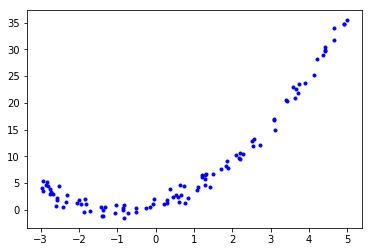

In [79]:
x = 8 * np.random.rand(100, 1)-3
y = 1*x**2 + 2*x + 1 + np.random.randn(100,1)
plt.plot(x, y, 'b.')

In [57]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, include_bias=False)
x_poly = poly.fit_transform(x)
x[0], x_poly[0]

(array([ 3.27675178]), array([  3.27675178,  10.73710225]))

In [58]:
poly_reg = LinearRegression()
poly_reg.fit(x_poly, y)
poly_reg.intercept_, poly_reg.coef_

(array([ 1.01600855]), array([[ 2.02584802,  0.98066981]]))

The original model is 

y = 1*x**2 + 2*x + 1 + Gaussian noise

Our polynomial model suggests 

y = 0.98*x**2 + 2.03*x + 1.02

What is the effect of fitting 300 degree model (eg x**100)?
It will produce a model with extremely good fit but we are overfitting the model.

In [93]:
#Making some predictions

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)
    train_error, test_error = [],[]
    for i in range(1, len(x_train)):
        model.fit(x_train[:i],y_train[:i])
        y_train_predict = model.predict(x_train[:i])
        y_test_pred = model.predict(x_test)
        train_error.append(mean_squared_error(y_train_predict, y_train[:i]))
        test_error.append(mean_squared_error(y_test_pred, y_test))
    plt.plot(np.sqrt(train_error), 'r-+')
    plt.xlabel('training size')
    plt.plot(np.sqrt(test_error),'b-')
    plt.ylabel('RMSE')




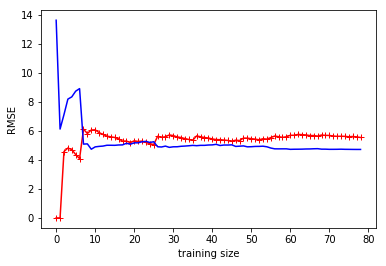

In [94]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x, y)

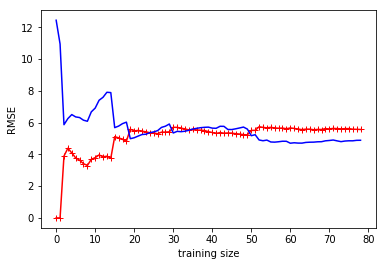

In [145]:
# poly_regression = Pipeline(
#     (('poly_features', PolynomialFeatures(degree = 10, include_bias=False)),
#                            ('sgd',LinearRegression()),
#     ))

poly = PolynomialFeatures(degree = 2, include_bias=False)
x_D10 = poly.fit_transform(x)
poly_reg10 = LinearRegression()
poly_reg10.fit(x_D10, y)

plot_learning_curves(poly_reg10, x, y)

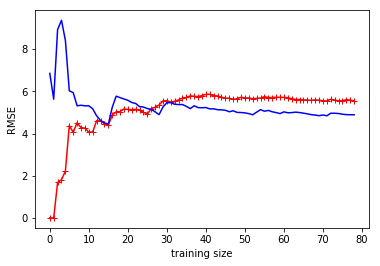

In [146]:
poly = PolynomialFeatures(degree = 10, include_bias=False)
x_D10 = poly.fit_transform(x)
poly_reg10 = LinearRegression()
poly_reg10.fit(x_D10, y)

plot_learning_curves(poly_reg10, x, y)

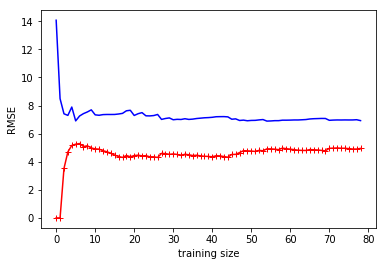

In [147]:
poly = PolynomialFeatures(degree = 100, include_bias=False)
x_D10 = poly.fit_transform(x)
poly_reg10 = LinearRegression()
poly_reg10.fit(x_D10, y)

plot_learning_curves(poly_reg10, x, y)